## 딥러닝 활용 (1)
### : CNN익히기 with MNIST 손글씨 인식

### >> Step1. 데이터 전처리

In [1]:
from keras.datasets import mnist

(X_train, Y_class_train),(X_test, Y_class_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


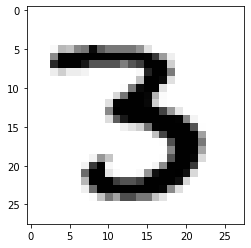

In [8]:
#한 글자만 불러와보기
import matplotlib.pyplot as plt

plt.imshow(X_train[12], cmap='Greys')
plt.show()

In [9]:
#2차원 배열 1차원 값으로 만들기
X_train = X_train.reshape(X_train.shape[0], 784) #X_train.shape[0]은 총 학습 데이터의 개수

#Data normaliztion : Keras의 입력값은 0~1의 값이 좋다
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [17]:
#Y의 클래스에 원 핫 인코딩 적용 하기
from keras.utils import np_utils

Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

###  >> Step2. 딥러닝 기본 프레임 워크 만들기

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# train set, test set나누고 데이터 전처리
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

Y_train = np_utils.to_categorical(Y_train,10)
Y_test = np_utils.to_categorical(Y_test, 10)


#모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

#모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])


Epoch 00001: val_loss improved from inf to 0.14746, saving model to ./mnist_model/01-0.1475.hdf5

Epoch 00002: val_loss improved from 0.14746 to 0.10214, saving model to ./mnist_model/02-0.1021.hdf5

Epoch 00003: val_loss improved from 0.10214 to 0.08899, saving model to ./mnist_model/03-0.0890.hdf5

Epoch 00004: val_loss improved from 0.08899 to 0.07861, saving model to ./mnist_model/04-0.0786.hdf5

Epoch 00005: val_loss improved from 0.07861 to 0.07415, saving model to ./mnist_model/05-0.0742.hdf5

Epoch 00006: val_loss improved from 0.07415 to 0.06754, saving model to ./mnist_model/06-0.0675.hdf5

Epoch 00007: val_loss improved from 0.06754 to 0.06505, saving model to ./mnist_model/07-0.0651.hdf5

Epoch 00008: val_loss improved from 0.06505 to 0.06265, saving model to ./mnist_model/08-0.0627.hdf5

Epoch 00009: val_loss did not improve from 0.06265

Epoch 00010: val_loss did not improve from 0.06265

Epoch 00011: val_loss did not improve from 0.06265

Epoch 00012: val_loss did not i

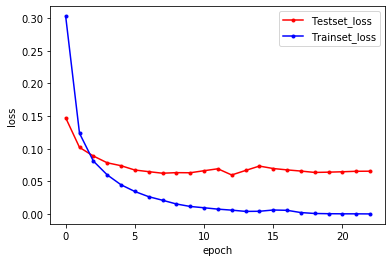

In [41]:
#모델 최적화 설정
MODEL_DIR = './mnist_model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./mnist_model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer= ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

#모델 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

#테스트정확도 출력
print("\n Test Accuracy: %.4f"%(model.evaluate(X_test, Y_test)[1]))

#테스트 셋의 오차
y_vloss = history.history['val_loss']
#학습 셋의 오차
y_loss = history.history['loss']

#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".",c="red", label = "Testset_loss")
plt.plot(x_len, y_loss, marker=".",c="blue", label = "Trainset_loss")

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## CNN: Conventional Neural Network 

In [38]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# train set, test set나누고 데이터 전처리
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float64') / 255

Y_train = np_utils.to_categorical(Y_train,10)
Y_test = np_utils.to_categorical(Y_test, 10)


#컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])


Epoch 00001: val_loss improved from inf to 0.05428, saving model to ./mnist_model/01-0.0543.hdf5

Epoch 00002: val_loss improved from 0.05428 to 0.03938, saving model to ./mnist_model/02-0.0394.hdf5

Epoch 00003: val_loss improved from 0.03938 to 0.03696, saving model to ./mnist_model/03-0.0370.hdf5

Epoch 00004: val_loss improved from 0.03696 to 0.03236, saving model to ./mnist_model/04-0.0324.hdf5

Epoch 00005: val_loss improved from 0.03236 to 0.03097, saving model to ./mnist_model/05-0.0310.hdf5

Epoch 00006: val_loss improved from 0.03097 to 0.02937, saving model to ./mnist_model/06-0.0294.hdf5

Epoch 00007: val_loss did not improve from 0.02937

Epoch 00008: val_loss did not improve from 0.02937

Epoch 00009: val_loss did not improve from 0.02937

Epoch 00010: val_loss did not improve from 0.02937

Epoch 00011: val_loss improved from 0.02937 to 0.02764, saving model to ./mnist_model/11-0.0276.hdf5

Epoch 00012: val_loss did not improve from 0.02764

Epoch 00013: val_loss improve

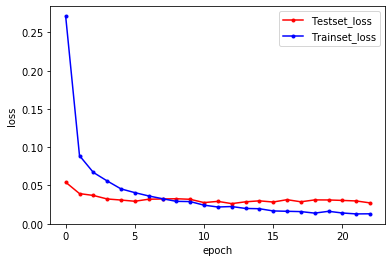

In [39]:
#모델 최적화 설정
MODEL_DIR = './mnist_model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./mnist_model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer= ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

#모델 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

#테스트정확도 출력
print("\n Test Accuracy: %.4f"%(model.evaluate(X_test, Y_test)[1]))

#테스트 셋의 오차
y_vloss = history.history['val_loss']
#학습 셋의 오차
y_loss = history.history['loss']

#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".",c="red", label = "Testset_loss")
plt.plot(x_len, y_loss, marker=".",c="blue", label = "Trainset_loss")

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()